In [3]:
import pandas as pd
import seaborn as sb
from pathlib import Path

base_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Models'
if not Path(base_dir).exists():
    base_dir = 'Y:/data/Cerebellum/ProbabilisticParcellationModel/Models'

## Check consistency of performance across test-tests 

In [4]:
D = pd.read_csv(base_dir + '/Evaluation/eval_all_asym_Ib_K-10_twoSess_on_leftSess.tsv',sep='\t')
D

,model_name,atlas,K,train_data,train_loglik,test_data,indivtrain_ind,indivtrain_val,subj_num,common_kappa,dcbc_group,dcbc_indiv,model_type,D,coserr_group,coserr_floor,sess1_rel,sess2_rel,test_sess_out
0,asym_Ib,MNISymC3,10,['Ibc'],1.171150e+06,IBC,NaN,0,0,True,0.028159,0.029232,Models_03,archi,0.827988,0.519081,0.133527,0.168251,archi+clips4
1,asym_Ib,MNISymC3,10,['Ibc'],1.171150e+06,IBC,NaN,0,1,True,0.045287,0.014926,Models_03,archi,0.741506,0.468500,0.133527,0.168251,archi+clips4
2,asym_Ib,MNISymC3,10,['Ibc'],1.171150e+06,IBC,NaN,0,2,True,0.025455,0.028035,Models_03,archi,0.830182,0.494622,0.133527,0.168251,archi+clips4
3,asym_Ib,MNISymC3,10,['Ibc'],1.171150e+06,IBC,NaN,0,3,True,0.029151,0.020130,Models_03,archi,0.800538,0.512968,0.133527,0.168251,archi+clips4
4,asym_Ib,MNISymC3,10,['Ibc'],1.171150e+06,IBC,NaN,0,4,True,0.016104,0.016084,Models_03,archi,0.911722,0.651117,0.133527,0.168251,archi+clips4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6547,asym_Ib,MNISymC3,10,['Ibc'],-6.434336e+05,IBC,NaN,0,7,False,0.000000,0.000000,Models_04,spatialnavigation+tom,NaN,NaN,0.561766,0.432398,spatialnavigation+tom
6548,asym_Ib,MNISymC3,10,['Ibc'],-6.434336e+05,IBC,NaN,0,8,False,0.015427,0.018743,Models_04,spatialnavigation+tom,0.710347,0.444257,0.561766,0.432398,spatialnavigation+tom
6549,asym_Ib,MNISymC3,10,['Ibc'],-6.434336e+05,IBC,NaN,0,9,False,0.019991,0.025548,Models_04,spatialnavigation+tom,0.779771,0.585647,0.561766,0.432398,spatialnavigation+tom
6550,asym_Ib,MNISymC3,10,['Ibc'],-6.434336e+05,IBC,NaN,0,10,False,0.017233,0.024368,Models_04,spatialnavigation+tom,0.688362,0.470013,0.561766,0.432398,spatialnavigation+tom


In [5]:
D['joint_session']=D['D'].str.contains("\+",case=False)

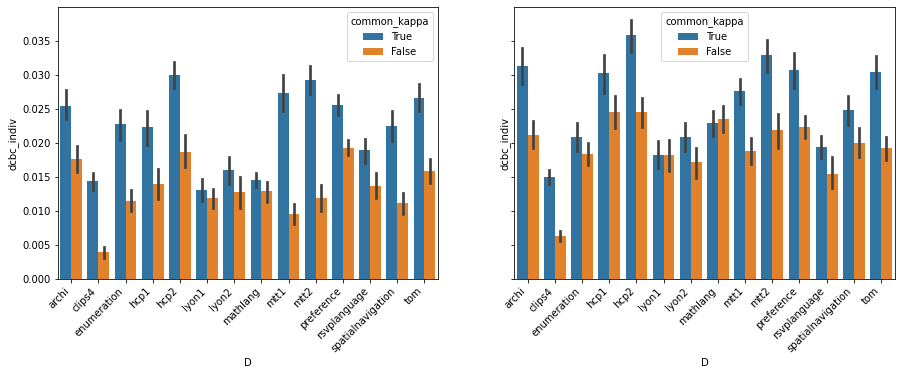

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey='row')

for i, k in enumerate([10,20]):
    D = pd.read_csv(base_dir + f'/Evaluation/eval_all_asym_Ib_K-{k}_twoSess_on_leftSess.tsv',sep='\t')
    D['joint_session']=D['D'].str.contains("\+",case=False)
    sb.barplot(ax=axs[i], data=D[D.joint_session==False], y='dcbc_indiv', x='D',
               hue='common_kappa', hue_order=D["common_kappa"].unique())
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')

In [14]:
D = pd.read_csv(base_dir + '/Evaluation/eval_all_asym_Ib_K-10_indivSess_on_otherDatasets.tsv',sep='\t')

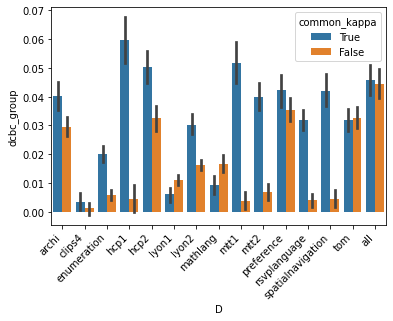

In [16]:
ax = sb.barplot(data=D,y='dcbc_group',x='D',hue='common_kappa', hue_order=D["common_kappa"].unique())
a=ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')